In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('uber.csv')
df.shape

(200000, 9)

In [8]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
##Converting Longitude Latitude to Distance using Haversine formula

def haversine(long_1,lat_1,long_2,lat_2):
    long_1,lat_1,long_2,lat_2 = map(np.radians, [long_1,lat_1,long_2,lat_2]) #Degree to Radians
    diff_long = long_2 - long_1
    diff_lat = lat_2 - lat_1

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 +
                                            np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_long/2.0)**2))
    return km

In [15]:
df['Distance'] = haversine(df['pickup_longitude'],df['pickup_latitude'],df['dropoff_longitude'],df['dropoff_latitude'])

In [16]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  
0         -73.999512         40.723217                1  1.683323  
1         -73.994710         40.750325                1  2.457590  
2         -73.962565         40.772647                1  5.036377  
3         -73.965316         40.803349                3  1.661683  
4         -73.973082         40.761247                5  4.475450

In [19]:
df['Distance'] = df['Distance'].round(2)
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  Distance  
0         -73.999512         40.723217                1      1.68  
1         -73.994710         40.750325                1      2.46  
2         -73.962565         40.772647                1      5.04  
3         -73.965316         40.803349                3      1.66  
4         -73.973082         40.761247                5      4.48

Text(0, 0.5, 'Fare Amount')

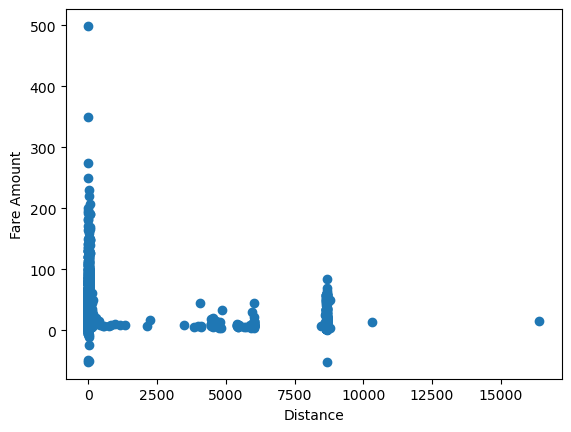

In [20]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

In [22]:
#We get rid of unusual data (Outliers)
df.drop(df[df['Distance'] > 60 ].index, inplace=True)
df.drop(df[df['Distance'] == 0 ].index, inplace=True)
df.drop(df[df['fare_amount'] == 0 ].index, inplace=True)
df.drop(df[df['fare_amount'] < 0 ].index, inplace=True)
df.shape

(193490, 10)

In [27]:
df.drop(df[(df['fare_amount']>100) & (df['Distance'] < 1)].index, inplace=True)
df.drop(df[(df['fare_amount']<100) & (df['Distance'] > 100)].index, inplace=True)
df.shape

(193481, 10)

Text(0, 0.5, 'Fare Amount')

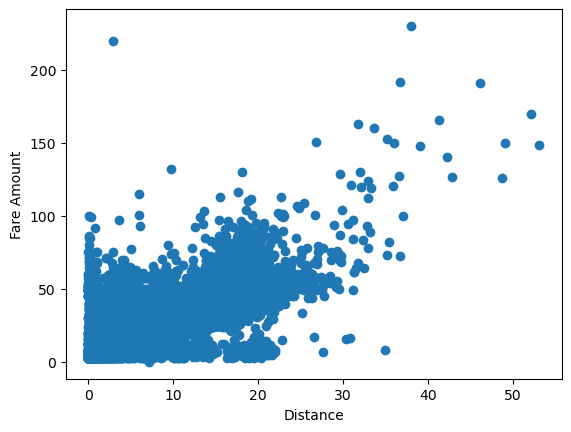

In [28]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

In [35]:
df2 = df[['fare_amount','Distance']].copy()

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193481 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fare_amount  193481 non-null  float64
 1   Distance     193481 non-null  float64
dtypes: float64(2)
memory usage: 4.4 MB


In [43]:
x = df['Distance'].values.reshape(-1,1)
y = df['fare_amount'].values.reshape(-1,1)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [45]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred =lrmodel.predict(x_test)

In [51]:
#Find Error Rates
from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  2.3041696591669125
Mean Squared Error :  18.59341450343233
Root Mean Squared Error :  4.312008175251101


In [54]:
plt.subplot(2,2,1)
plt.scatter(x_train,y_train)
plt.plot(x_train,lrmodel.predict(x_train),color='red')
plt.title("Fare vs Distance (Training Set)")
plt.xlabel('Distance')
plt.ylabel('Fare')

plt.subplot(2,2,2)
plt.scatter(x_test,y_test)
plt.plot(x_train,lrmodel.predict(x_train),color='red')
plt.title("Fare vs Distance (Test Set)")
plt.xlabel('Distance')
plt.ylabel('Fare')


Text(0, 0.5, 'Fare')